importing the necessary libraries.

In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
data = pd.read_csv("USA_Housing.csv")

In [4]:
data.head()

Avg. Area Income  Avg. Area House Age  Avg. Area Number of Rooms  \
0      79545.458574             5.682861                   7.009188   
1      79248.642455             6.002900                   6.730821   
2      61287.067179             5.865890                   8.512727   
3      63345.240046             7.188236                   5.586729   
4      59982.197226             5.040555                   7.839388   

   Avg. Area Number of Bedrooms  Area Population         Price  \
0                          4.09     23086.800503  1.059034e+06   
1                          3.09     40173.072174  1.505891e+06   
2                          5.13     36882.159400  1.058988e+06   
3                          3.26     34310.242831  1.260617e+06   
4                          4.23     26354.109472  6.309435e+05   

                                             Address  
0  208 Michael Ferry Apt. 674\nLaurabury, NE 3701...  
1  188 Johnson Views Suite 079\nLake Kathleen, CA...  
2  9127 Elizabeth Stravenue\nDanieltown, WI 06482...  
3                          USS Barnett\nFPO AP 44820  
4                         USNS Raymond\nFPO AE 09386

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
Avg. Area Income                5000 non-null float64
Avg. Area House Age             5000 non-null float64
Avg. Area Number of Rooms       5000 non-null float64
Avg. Area Number of Bedrooms    5000 non-null float64
Area Population                 5000 non-null float64
Price                           5000 non-null float64
Address                         5000 non-null object
dtypes: float64(6), object(1)
memory usage: 273.5+ KB


In [7]:
data.describe()

Avg. Area Income  Avg. Area House Age  Avg. Area Number of Rooms  \
count       5000.000000          5000.000000                5000.000000   
mean       68583.108984             5.977222                   6.987792   
std        10657.991214             0.991456                   1.005833   
min        17796.631190             2.644304                   3.236194   
25%        61480.562388             5.322283                   6.299250   
50%        68804.286404             5.970429                   7.002902   
75%        75783.338666             6.650808                   7.665871   
max       107701.748378             9.519088                  10.759588   

       Avg. Area Number of Bedrooms  Area Population         Price  
count                   5000.000000      5000.000000  5.000000e+03  
mean                       3.981330     36163.516039  1.232073e+06  
std                        1.234137      9925.650114  3.531176e+05  
min                        2.000000       172.610686  1.593866e+04  
25%                        3.140000     29403.928702  9.975771e+05  
50%                        4.050000     36199.406689  1.232669e+06  
75%                        4.490000     42861.290769  1.471210e+06  
max                        6.500000     69621.713378  2.469066e+06

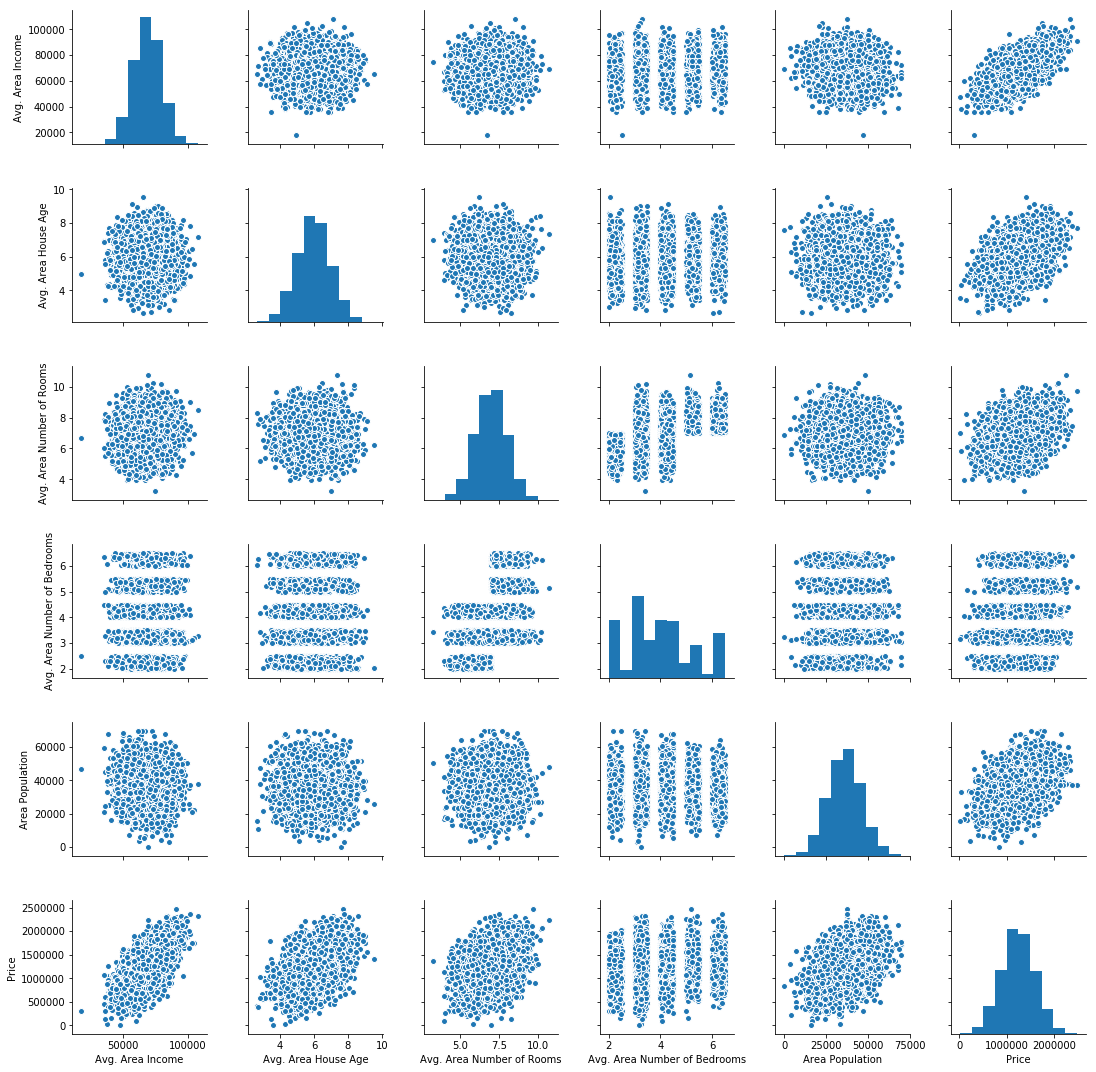

In [12]:
sns.pairplot(data)

It can be observed that **Avg. Area Income** and **Price** have a strongest relation among all.
We can verify this through **correlation**

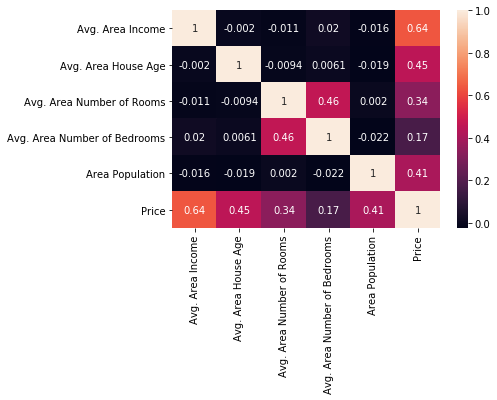

In [11]:
sns.heatmap(data.corr(), annot = True)

Since the **Address** column is unrelated to our final price here.  
So we will eliminate that column form our data.  
Although in practical, it may be related to our price because of location.

In [17]:
X = data.iloc[:,:5]
Y = data.iloc[:,5]

Here **X** is the dataframe of our features.  
and **Y** is the final value to be predicted.

In [26]:
from sklearn.cross_validation import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.4, random_state = 101)

Here we have splitted the dataset into **Train** and **Test** portion.

In [22]:
from sklearn.linear_model import LinearRegression

In [28]:
regressor = LinearRegression()

In [29]:
regressor.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [31]:
regressor.intercept_

-2640159.796851911

Here we can see the intercept for the regression.

In [32]:
regressor.coef_

array([2.15282755e+01, 1.64883282e+05, 1.22368678e+05, 2.23380186e+03,
       1.51504200e+01])

In [44]:
pd.DataFrame(index = X_train.columns, columns= ['Coeff'], data = regressor.coef_)

Coeff
Avg. Area Income                  21.528276
Avg. Area House Age           164883.282027
Avg. Area Number of Rooms     122368.678027
Avg. Area Number of Bedrooms    2233.801864
Area Population                   15.150420

Here are the weights or coefficients for each of the features.

In [30]:
Y_pred = regressor.predict(X_test)

Predicting the Price through aur fitted regressor

### Visualising

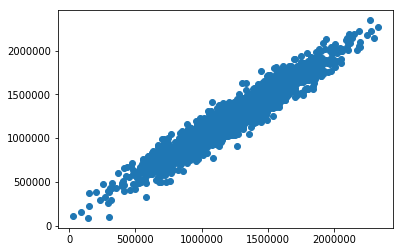

In [60]:
plt.scatter(Y_test,Y_pred)

As we can observe that our **ActualPrice** and **Predicted Price** form a very impressive regression line.

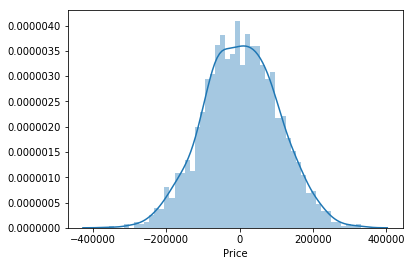

In [63]:
sns.distplot((Y_pred- Y_test), bins = 50)

A **Normal Distribution** of the residuals show that Linear model was suitable model for our problem.

### Regression Evaluation Metrics

- **MAE** is the easiest to understand, because it's the average error.
- **MSE** is more popular than MAE, because MSE "punishes" larger errors, which tends to be useful in the real world.
- **RMSE** is even more popular than MSE, because RMSE is interpretable in the "y" units.

In [64]:
from sklearn import metrics

In [66]:
MAE = metrics.mean_absolute_error(Y_test, Y_pred)
MSE = metrics.mean_squared_error(Y_test, Y_pred)
RMSE = np.sqrt(MSE)

In [68]:
print(MAE)
print(MSE)
print(RMSE)

82288.22251914957
10460958907.209501
102278.82922291153
